In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import integrate

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [4]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [5]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t


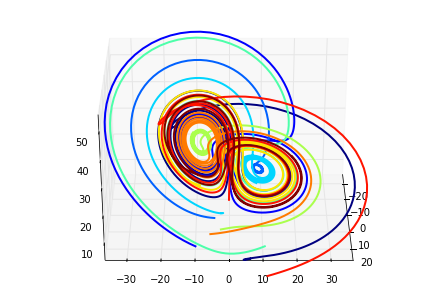

(array([ 0.        ,  0.004004  ,  0.00800801,  0.01201201,  0.01601602,
         0.02002002,  0.02402402,  0.02802803,  0.03203203,  0.03603604,
         0.04004004,  0.04404404,  0.04804805,  0.05205205,  0.05605606,
         0.06006006,  0.06406406,  0.06806807,  0.07207207,  0.07607608,
         0.08008008,  0.08408408,  0.08808809,  0.09209209,  0.0960961 ,
         0.1001001 ,  0.1041041 ,  0.10810811,  0.11211211,  0.11611612,
         0.12012012,  0.12412412,  0.12812813,  0.13213213,  0.13613614,
         0.14014014,  0.14414414,  0.14814815,  0.15215215,  0.15615616,
         0.16016016,  0.16416416,  0.16816817,  0.17217217,  0.17617618,
         0.18018018,  0.18418418,  0.18818819,  0.19219219,  0.1961962 ,
         0.2002002 ,  0.2042042 ,  0.20820821,  0.21221221,  0.21621622,
         0.22022022,  0.22422422,  0.22822823,  0.23223223,  0.23623624,
         0.24024024,  0.24424424,  0.24824825,  0.25225225,  0.25625626,
         0.26026026,  0.26426426,  0.26826827,  0.2

In [12]:
solve_lorenz(angle = 0, N = 10)

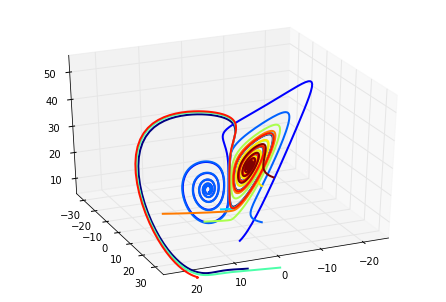

(array([  0.00000000e+00,   4.00363967e-03,   8.00727934e-03, ...,
          4.39199272e+00,   4.39599636e+00,   4.40000000e+00]),
 array([[[ -2.48933986,   6.6097348 , -14.99656876],
         [ -1.15683849,   6.33540878, -14.88372521],
         [ -0.05046242,   6.22955998, -14.74034593],
         ..., 
         [ -6.49336938,  -6.62141349,  17.53963484],
         [ -6.5143308 ,  -6.64609131,  17.52518813],
         [ -6.53587906,  -6.67119658,  17.51210331]],
 
        [[ -5.93002282, -10.59732328, -12.22984216],
         [ -6.68198659, -11.34937863, -11.82433358],
         [ -7.44011576, -12.18127331, -11.36789668],
         ..., 
         [  6.74409161,   6.903381  ,  17.45505441],
         [  6.76993829,   6.931001  ,  17.4558227 ],
         [  6.79605434,   6.95868236,  17.45804562]],
 
        [[ -9.41219366,  -4.63317819,  -3.09697577],
         [ -8.7618933 ,  -5.4295507 ,  -2.88235157],
         [ -8.32236645,  -6.1665575 ,  -2.65482376],
         ..., 
         [  6.72868142,

In [13]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);
